In [1]:
from IPython import get_ipython
my_variables = set(dir())  # Write this line at the beginning of cell
my_variables = list(set(dir()) - my_variables)  # Write these 2 lines at the end of cell
get_ipython().magic('%reset_selective -f [{}]'.format(','.join(my_variables)))

import cv2 as cv
import numpy as np
import numpy.ma as ma
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw 
import pylab

In [2]:
def plt_show(image, color = None):
    pic_size=5
    plt.figure(figsize = (pic_size, pic_size))
    plt.imshow(image, color)
    plt.show()

In [3]:
def otsuFragment(pix, old):
    hist = hist_ar(pix)

    summ = 0
    for x in range(len(pix)):
        summ = summ +pix[x]

    indexMax = 0
    sigMax = 0.0 

    l1 = 0 
    o1 = 0
    
    if len(old)==0:
        old_new=[0]

    for thresh in range(1,len(hist)): 
       
        if not thresh in old:
            l1 = l1 +  hist[thresh]
            
            # print("o1 ",o1)
            o1 =o1+ thresh * hist[thresh]
    
            # print("l1",l1)
            omega1 = l1 /len(pix) 
            omega2 = 1.0 - omega1 
    
            lyamda1 = o1 /l1
            lyamda2 = (summ - o1)/(len(pix) - l1)
            
            between = lyamda1 - lyamda2
    
            sigma = omega1 * omega2 * between * between

            if (sigma > sigMax): 
                sigMax = sigma
                indexMax = thresh
    return indexMax 

def hist_ar(pixarr):
        h = np.zeros(256, np.float32)
        for x in range(len(pixarr)):
            h[round(pixarr[x])]=h[round(pixarr[x])]+1
        for i in range(len(h)):
            if len(h)>i:
                if ((h[i]==0) & (len(h)>0)):
                    h=np.setdiff1d(h, 0)
                    i = i - 1
        return h
   

def otsu_locs():
    parts=10
    image_name="pic4.jpg"
    ref = pixarr = cv.imread(image_name, cv.IMREAD_GRAYSCALE)
    image = Image.open(image_name)
    new_pix = ImageDraw.Draw(image)  
    partsH = 2;  partsV = 3
    
    sizeV = image.size[1];  sizeH = image.size[0]
    arr = np.array([x for x in range(0,sizeH-sizeH//partsV+1,int(sizeH//partsV))])
    stepH = [arr,[0,249,  332,  415,  498,  581,  664, 1422] ,np.array([x for x in range(0,sizeH-sizeH//parts+1,int(sizeH//parts))]),[0, 275, 470,562, 830, 1182,1422], [0, 532, 896, 1422], [0,1422],[0, 478, 960, 1422]]
    stepV = [0, 217,279, 355, 419, 557, 605, 711]

    for i in range(len(stepV)-1):
        for j in range(len(stepH[i])-1):
            
            arr1 = arr = (pixarr[stepV[i]:stepV[i+1],stepH[i][j]:stepH[i][j+1]])
            limit = otsuFragment(arr1.reshape(len(arr)*len(arr[0])), [])
            
            if(stepV[i]==279 & stepV[i+1]==335)|(stepH[i][j+1]<230)|(stepV[i+1]==605) |(stepH[i][j+1]>1090 & stepV[i+1]>500):
                limit, _ = cv.threshold(arr,150,255,cv.THRESH_BINARY_INV)
            for x in range(stepV[i],stepV[i+1]):
                for y in range(stepH[i][j],stepH[i][j+1]):
                    if arr[x-stepV[i],y-stepH[i][j]] < limit:
                        pix = 0
                    else:
                        pix = 255
                    ref[x][y]=pix
                    
    plt_show(ref, "gray")
    Image.fromarray(ref).save("carnum.jpg")
    return ref



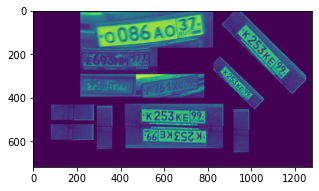

In [4]:
pic_size = 5
ref = cv.imread("pic4.jpg", cv.IMREAD_GRAYSCALE)
plt_show(ref)

In [5]:
# import easyocr
# # !pip install easyocr
# def recognize_text(img_path):
#     '''loads an image and recognizes text.'''
#     reader = easyocr.Reader(['en'])
#     return reader.readtext(img_path)

# result = recognize_text("carnum.jpg")
# result

In [6]:
binr = otsu_locs()

IndexError: index 616 is out of bounds for axis 1 with size 616

In [ ]:
circle = cv.getStructuringElement(cv.MORPH_ELLIPSE, (21, 16))
r = cv.dilate(binr, circle)  
plt_show(r)
c, contours= cv.findContours(r,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
# print(c)
count=0
# print(type(c), contours)
contour = []
for i in c:
    if(len(i)>200):
        count = count + 1
        contour.append(i)
print("Count ",count)

d = np.zeros((711,1422))
d = cv.drawContours(d,contour,-1,[255,189,0],2)
plt_show(d, "gray")
plt_show(d)

d = cv.drawContours(ref,contour,-1,[255,189,0],2)
plt_show(d, "gray")
plt_show(d)

# CV_CHAIN_APPROX_SIMPLE — склеивает все горизонтальные, вертикальные и диагональные контуры.

In [ ]:
# for i in range(40,70):
#     print(i)
#     _, picture = cv.threshold(cv.imread("carcar.jpg", cv.IMREAD_GRAYSCALE),i,255,cv.THRESH_BINARY_INV)
#     plt.figure(figsize = (pic_size, pic_size))
#     plt.imshow(picture, cmap="gray")
#     plt.show()

In [ ]:
# for i in range(10,30):
#     for j in range(10,30):
#         circle = cv.getStructuringElement(cv.MORPH_ELLIPSE, (i, j))# np.ones((20,24),np.uint8)
#         r = cv.dilate(binr, circle)  
#         print(i,j)
#         plt_show(r)
# #         Image.fromarray(r).save("carnum.jpg")